# Perceptron

In [1]:
# Importation des librairies
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Génération d'un dataset fictif
X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=0)

# Création du vecteur unitaire pour le biais
unit_vector = np.ones(X.shape[0], int)
unit_vector = unit_vector.reshape((unit_vector.shape[0], 1))

# Reformatage de la matrice des features et du vecteur target
X = np.concatenate((X, unit_vector), axis = 1)
y = y.reshape((y.shape[0], 1))

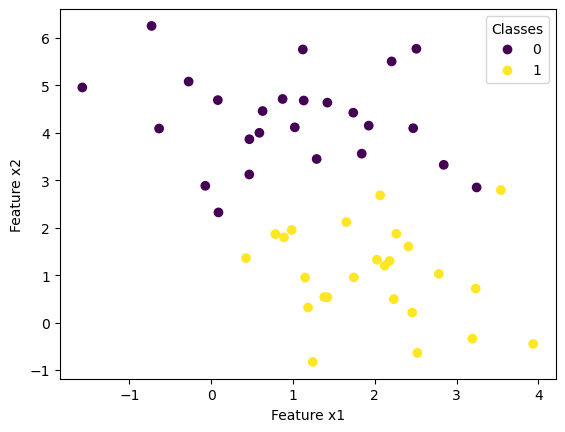

In [3]:
# Visualisation des données
scatter_plot = plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend(*scatter_plot.legend_elements(),
           loc='best', title='Classes')
plt.savefig('dataviz.png', bbox_inches = 'tight', pad_inches = .1);

In [4]:
# Fonction d'initialisation
def initialize(X):
    np.random.seed(6)
    W = np.random.randn(X.shape[1], 1)
    return W

In [5]:
# Equations fondamentales
def model(X, W):
    Z = X.dot(W)
    A = 1 / (1 + np.exp(-Z))
    return A

In [6]:
# Fonction-cout
def log_loss(A, y):
    L = -1/len(y) * np.sum((y * np.log(A)) + ((1-y) * np.log(1-A)))
    return L

In [7]:
# Vecteur des gradients (Jacobien)
def gradients(A, X, y):
    J = 1/len(y) * np.dot(X.T, (A - y))
    return J

In [8]:
# Actualisation des parametres
def update(J, W, learning_rate):
    W = W - learning_rate * J
    return W

In [9]:
# Algorithme d'optimisation
def perceptron(X, y, learning_rate, n_iterations):
    
    W = initialize(X)
    L = []

    for h in range(n_iterations):
        A = model(X, W)
        L.append(log_loss(A, y))
        J = gradients(A, X, y)
        W = update(J, W, learning_rate)

    plt.plot(L)
    plt.xlabel('Itérations')
    plt.ylabel('Coût')
    plt.show()

    return W

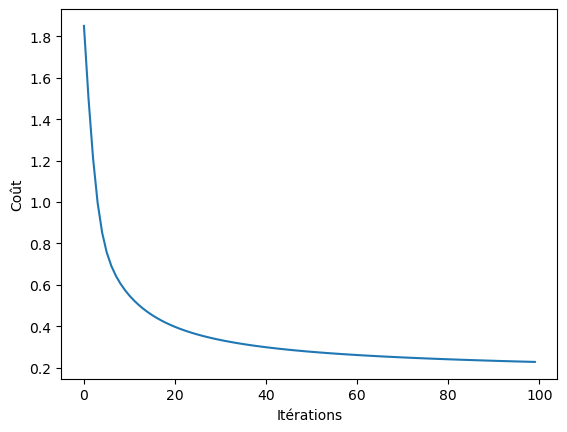

array([[ 1.01641857],
       [-1.07049618],
       [ 0.81282977]])

In [10]:
# Entrainement du modèle
W = perceptron(X, y, learning_rate = .1, n_iterations = 100)
W

In [11]:
# Fonction de prédiction
def predict(X, W):
    A = model(X, W)
    y_pred = []
    for i in range(X.shape[0]):
        if A[i] >= .5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred = predict(X, W)

In [12]:
# Matrice de confusion
def confusion_matrix(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    n_classes = np.unique(y_true).shape[0]
    confusion_matrix = np.zeros((n_classes, n_classes))

    for i in range(len(y_true)):
        confusion_matrix[y_true[i], y_pred[i]] += 1
    
    return confusion_matrix

ConfusionMatrix = confusion_matrix(y_true = y, y_pred = y_pred)
print(ConfusionMatrix)

[[23.  2.]
 [ 4. 21.]]


In [13]:
# Accuracy
def accuracy(confusion_matrix):
    diag = np.diag(confusion_matrix, k = 0)
    n_correct = diag.sum()
    n_total = confusion_matrix.sum()
    accuracy = n_correct / n_total
    return accuracy

Acc = accuracy(ConfusionMatrix)
print(Acc)

0.88


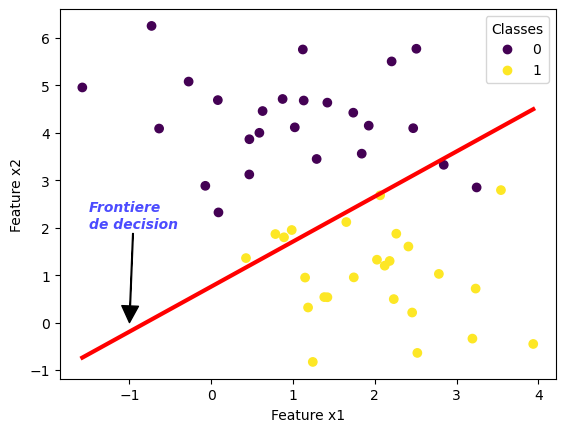

In [14]:
# Frontière de décision
scatter_plot = plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend(*scatter_plot.legend_elements(),
           loc='best', title='Classes')

x_line = np.linspace(min(X[:,0]), max(X[:,0]), num = 100)
y_line = -1/W[1] * (W[0]*x_line + W[2])
plt.plot(x_line, y_line, c = 'red', lw = 3)

plt.annotate('Frontiere \nde decision', (-1, 0), xytext = (-1.5, 2),
             arrowprops = dict(facecolor = 'black', width = .5),
             fontstyle = 'oblique', weight = 'bold',
             fontsize = 10, color = 'blue', alpha = .7)

plt.savefig('LinearDecision.png', bbox_inches = 'tight', pad_inches = .1);

# Réseau artificiel à 2 couches

In [1]:
# Importation des librairies
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

In [2]:
# Génération d'un dataset fictif
X, y = make_moons(n_samples = 100, noise = 0.1, random_state = 0)

# Création d'une troisième feature sur une échelle différente
x3 = np.where(y==1, np.random.randint(20,30,100), np.random.randint(30,40,100))
x3 = x3.reshape((X.shape[0], 1))

# Création du vecteur unitaire pour le biais
unit_vector = np.ones(X.shape[0], int)
unit_vector = unit_vector.reshape((unit_vector.shape[0], 1))

# Reformatage de la matrice des features et du vecteur target
X = np.concatenate((X, x3, unit_vector), axis = 1)
y = y.reshape((y.shape[0], 1))

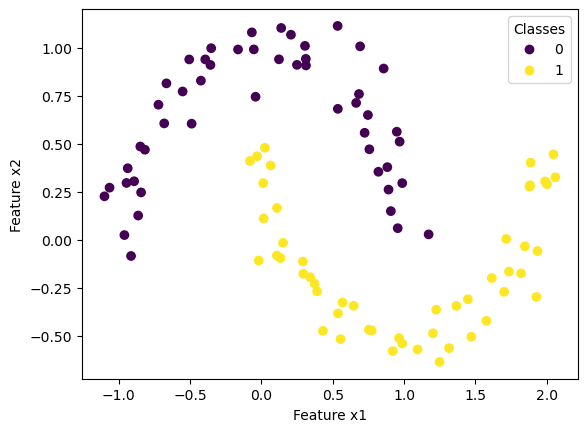

In [3]:
# Visualisation des données
scatter_plot = plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend(*scatter_plot.legend_elements(),
           loc='best', title='Classes')
plt.savefig('dataviz2.png', bbox_inches = 'tight', pad_inches = .1);

In [4]:
# Statistiques descriptives
means = np.mean(X[:,:3], axis = 0)
stds = np.std(X[:,:3], axis = 0)
minimum = np.min(X[:,:3], axis = 0)
maximum = np.max(X[:,:3], axis = 0)
quartiles = np.percentile(X[:,:3], [25, 50, 75], axis = 0)

In [5]:
# Standardisation
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit(X[:,:3]).transform(X[:,:3])
X_scaled = np.concatenate((X_scaled, unit_vector), axis = 1)

In [6]:
# Statistiques descriptives
means_s = np.mean(X_scaled[:,:3], axis = 0)
stds_s = np.std(X_scaled[:,:3], axis = 0)
minimum_s = np.min(X_scaled[:,:3], axis = 0)
maximum_s = np.max(X_scaled[:,:3], axis = 0)
quartiles_s = np.percentile(X_scaled[:,:3], [25, 50, 75], axis = 0)

In [7]:
# Fonction d'initialisation
def initialize(m, p1, p2):
    
    np.random.seed(0)
    W1 = np.random.randn(m, p1)
    W2 = np.random.randn(p1, p2)

    parametres = {
        'W1': W1,
        'W2': W2
    }

    return parametres

In [8]:
# Equations de la forward propagation
def forward_propagation(X, parametres):

    Z1 = X.dot(parametres['W1'])
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = A1.dot(parametres['W2'])
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [9]:
# Fonction-cout
def log_loss(activations, y):
    L=-1/len(y)*np.sum((y*np.log(activations['A2']))+((1-y)*np.log(1-activations['A2'])))
    return L

In [10]:
# Equations de la backward propagation
def backward_propagation(parametres, activations, X, y):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    dW2 = 1/len(y) * np.dot(A1.T, (A2 - y))
    dW1 = 1/len(y) * np.dot(X.T, (np.dot((A2 - y), W2.T) * (A1 * (1 - A1))))

    jacobiens = {
        'dW2': dW2,
        'dW1': dW1
    }

    return jacobiens

In [11]:
# Actualisation des parametres
def update(parametres, jacobiens, learning_rate):

    W1 = parametres['W1']
    W2 = parametres['W2']

    dW1 = jacobiens['dW1']
    dW2 = jacobiens['dW2']

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2

    parametres = {
        'W1': W1,
        'W2': W2
    }

    return parametres

In [12]:
# Fonction de prédiction
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']

    y_pred = []
    for i in range(X.shape[0]):
        if A2[i] >= .5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    return y_pred

In [13]:
# Algorithme d'optimisation
def ANN(X, y, m, p1, p2, learning_rate, n_iterations):
    
    parametres = initialize(m, p1, p2)
    L = []

    for h in range(n_iterations):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        L.append(log_loss(activations, y))
        jacobiens = backward_propagation(parametres, activations, X, y)
        parametres = update(parametres, jacobiens, learning_rate)

    plt.plot(L)
    plt.xlabel('Itérations')
    plt.ylabel('Coût')
    plt.show()

    return parametres

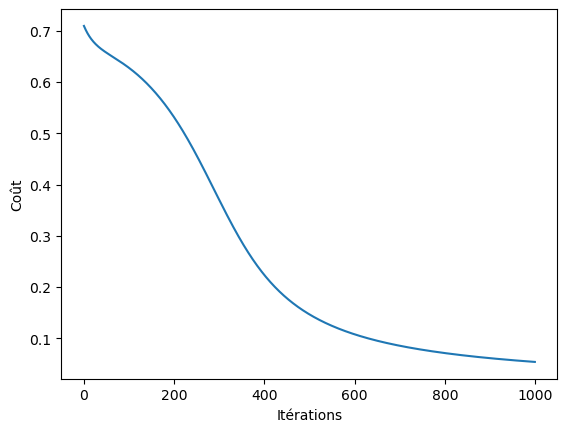

{'W1': array([[-0.25137171,  1.1330612 ],
       [ 1.73914313, -0.10473738],
       [ 3.41037617, -3.0092834 ],
       [-0.20575948,  0.39701278]]), 'W2': array([[-4.00410128],
       [ 3.7738144 ]])}


In [14]:
# Entrainement du modèle
parametres = ANN(X = X_scaled, y = y, m = X_scaled.shape[1], p1 = 2, p2 = 1,
                 learning_rate = .1, n_iterations = 1000)
print(parametres)

In [15]:
# Matrice de confusion
def confusion_matrix(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    n_classes = np.unique(y_true).shape[0]
    confusion_matrix = np.zeros((n_classes, n_classes))

    for i in range(len(y_true)):
        confusion_matrix[y_true[i], y_pred[i]] += 1
    
    return confusion_matrix

y_pred = predict(X_scaled, parametres)
ConfusionMatrix = confusion_matrix(y_true = y, y_pred = y_pred)
print(ConfusionMatrix)

[[50.  0.]
 [ 0. 50.]]


In [16]:
# Accuracy
def accuracy(confusion_matrix):
    diag = np.diag(confusion_matrix, k = 0)
    n_correct = diag.sum()
    n_total = confusion_matrix.sum()
    accuracy = n_correct / n_total
    return accuracy

# Train
Acc = accuracy(ConfusionMatrix)
print(Acc)

1.0


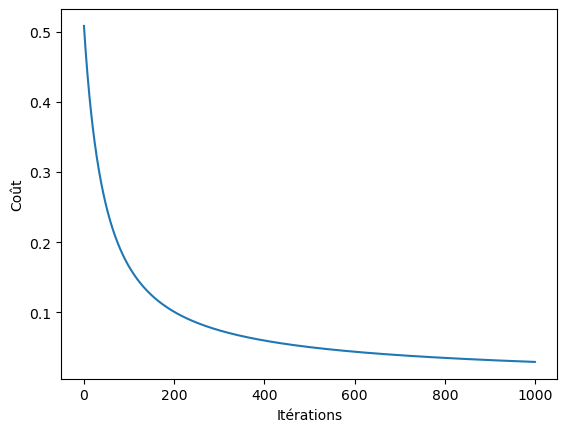

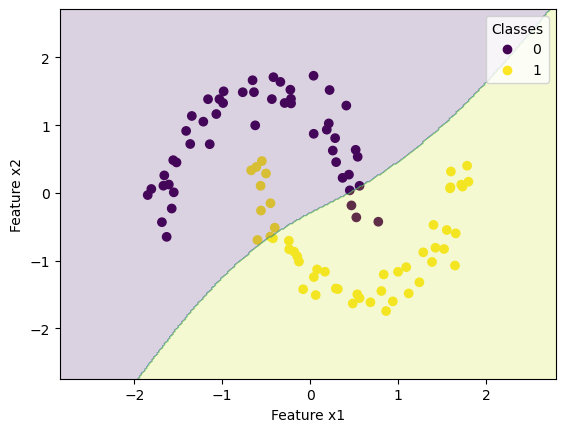

In [64]:
# Obtention des poids optimaux en 2D
model = ANN(X = X_scaled, y = y, m = X_scaled.shape[1], p1 = 9, p2 = 1,
                 learning_rate = .1, n_iterations = 1000)
weights = {'W1':model['W1'][[0,1]], 'W2':model['W2']}

# Définition de la grille pour la frontière de décision
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédire la classe pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = predict(grid_points, weights)  # Assurez-vous d'avoir les poids corrects ici

# Reformatage des prédictions pour qu'elles correspondent à la grille
predictions = np.array(predictions)
predictions = predictions.reshape(xx.shape)

# Traçage des points de données en 2D
scatter_plot = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend(*scatter_plot.legend_elements(),
           loc='best', title='Classes')

# Traçage de la frontière de décision non-linéaire
plt.contourf(xx, yy, predictions, alpha=0.2)

plt.savefig('NonLinearDecision.png', bbox_inches = 'tight', pad_inches = .1);

# Perceptron multi-couches

In [69]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
# Chargement des donnees
digits = load_digits()
print(digits.keys())
print(digits['DESCR'])

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [71]:
# Preparation du dataset
features = pd.DataFrame(data = digits['data'], columns = digits['feature_names'])
target = pd.DataFrame(data = digits['target'], columns = ['digits'])
digits_data = pd.concat([features, target], axis = 1)
digits_data.info()
digits_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digits
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


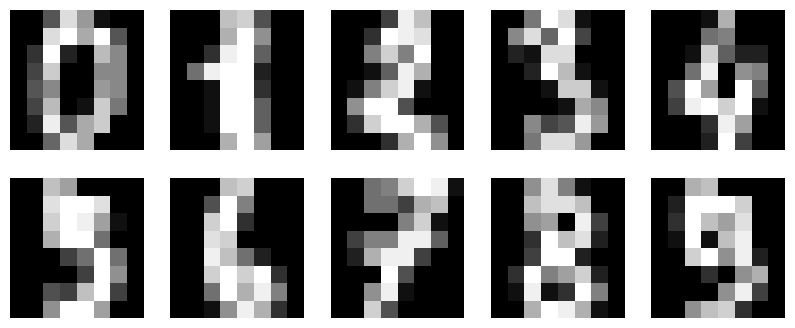

In [5]:
# Creer une figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Parcourir chaque axe et afficher l'image correspondante
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(data=digits.images[i], ax=ax, cmap='gray', cbar=False)
    ax.axis('off')

plt.savefig('digits.png', bbox_inches = 'tight', pad_inches = .1);

In [6]:
# Partitionnement des donnees
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1617, 64) (180, 64) (1617, 1) (180, 1)


In [16]:
# Entrainement du modele

warnings.filterwarnings('ignore')

hyper_param = {# profondeur du reseau
               'hidden_layer_sizes': [(10,), (10,10,), (10,10,10)],

               # fonction d'activation
               'activation': ['logistic', 'tanh', 'relu'],

               # type de taux d'apprentissage
               'learning_rate': ['invscaling', 'adaptive'],

               # algorithme d'optimisation
               'solver': ['lbfgs', 'sgd'],

               # parametre de regularisation
               'alpha': [.4, .5, .6]
              }

Grid_NN = GridSearchCV(MLPClassifier(random_state = 0),
                       param_grid = hyper_param, cv = 10)

# Obtenir le nombre total d'itérations pour la grille de recherche
len_layers = len(hyper_param['hidden_layer_sizes'])
len_activation = len(hyper_param['activation'])
len_learning_rate = len(hyper_param['learning_rate'])
len_solver = len(hyper_param['solver'])
len_alpha = len(hyper_param['alpha'])
total_iterations = len_layers*len_activation*len_learning_rate*len_solver*len_alpha

# Utilisation de tqdm pour afficher la barre de progression
with tqdm(total=total_iterations, desc='Grid Search Progress') as pbar:
    for param in Grid_NN.param_grid:
        Grid_NN.fit(X_train, y_train)
        # Mise à jour de la barre de progression à chaque itération
        pbar.update(1)

Grid Search Progress:   5%|▍         | 5/108 [1:23:25<28:38:35, 1001.12s/it]


In [52]:
# Valeurs optimales des hyper-parametres
print(Grid_NN.best_params_)

{'activation': 'relu', 'alpha': 0.4, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [53]:
# Performance du modele dans l'apprentissage
NN_model = Grid_NN.best_estimator_
NN_model.score(X_train, y_train)

0.9523809523809523

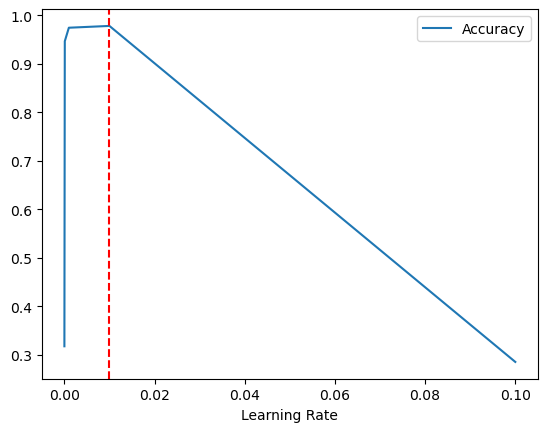

In [39]:
# Visualisation du tunning process (reglage des hyper-parametres)

learning_rate = np.logspace(-1,-5,5)
score_train, score_cv = validation_curve(MLPClassifier(random_state = 0),
                                         X_train, y_train, param_range = learning_rate,
                                         param_name = 'learning_rate_init', cv = 10)
score_cv = pd.DataFrame(score_cv.mean(axis = 1), columns = ['Accuracy'])
score_cv.set_index(learning_rate, inplace = True)
score_cv.index.names = ['Learning Rate']

sns.lineplot(data = score_cv).axvline(score_cv['Accuracy'].idxmax(), color = 'red', linestyle = 'dashed')
plt.savefig('tuning.png', bbox_inches = 'tight', pad_inches = .1);

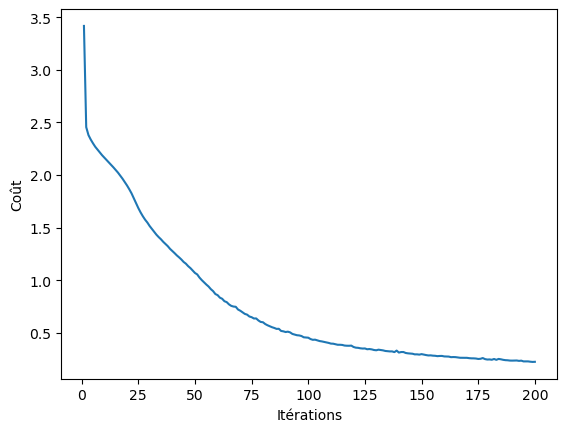

In [41]:
# Courbe d'apprentissage
sns.lineplot(x = range(1,len(NN_model.loss_curve_)+1), y = NN_model.loss_curve_)
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.savefig('LogLossANN.png', bbox_inches = 'tight', pad_inches = .1);

In [25]:
# Rapport de classification et Matrice de confusion
y_predict_NN = NN_model.predict(X_test)
print(classification_report(y_test, y_predict_NN))
conf_matrix_NN = pd.DataFrame(confusion_matrix(y_test, y_predict_NN))
conf_matrix_NN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.90      0.86        20
           2       1.00      1.00      1.00        16
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00        10
           5       0.90      0.90      0.90        21
           6       0.96      0.96      0.96        25
           7       0.95      1.00      0.98        20
           8       1.00      0.78      0.88        23
           9       0.96      0.92      0.94        24

    accuracy                           0.93       180
   macro avg       0.94      0.95      0.94       180
weighted avg       0.94      0.93      0.93       180



,0,1,2,3,4,5,6,7,8,9
0,11,0,0,0,0,0,0,0,0,0
1,0,18,0,1,0,0,0,1,0,0
2,0,0,16,0,0,0,0,0,0,0
3,0,0,0,10,0,0,0,0,0,0
4,0,0,0,0,10,0,0,0,0,0
5,0,0,0,1,0,19,1,0,0,0
6,0,1,0,0,0,0,24,0,0,0
7,0,0,0,0,0,0,0,20,0,0
8,0,2,0,1,0,1,0,0,18,1
9,0,1,0,0,0,1,0,0,0,22


In [26]:
# Performance du modele au test
NN_model.score(X_test, y_test)

0.9333333333333333

# TensorFlow

In [36]:
# Importation des librairies
#!pip install tensorflow (decommenter cette ligne pour installer la librairie)
!pip show tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\hp\appdata\roaming\python\python39\site-packages
Requires: tensorflow-intel
Required-by: 


In [37]:
# Chargement des donnees

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print('Train set X:', X_train.shape)
print('Test set X:', X_test.shape)
print('Train set y:', y_train.shape)
print('Test set y:', y_test.shape)

Train set X: (60000, 28, 28)
Test set X: (10000, 28, 28)
Train set y: (60000,)
Test set y: (10000,)


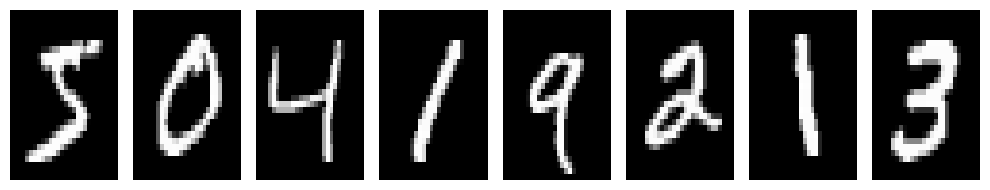

In [38]:
# Visualisation des données
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 2))
for i, ax in enumerate(axes.flatten()):
  sns.heatmap(data=X_train[i], ax=ax, cmap='gray', cbar=False)
  ax.axis('off')

plt.tight_layout()
plt.savefig('DataVizCV.png', bbox_inches = 'tight', pad_inches = .1);

In [39]:
# Reformatage et Standardisation des données
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit(X_train.reshape(X_train.shape[0], -1)).transform(X_train.reshape(X_train.shape[0], -1))
X_test = MinMaxScaler().fit(X_test.reshape(X_test.shape[0], -1)).transform(X_test.reshape(X_test.shape[0], -1))

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (60000, 784)
Test set: (10000, 784)


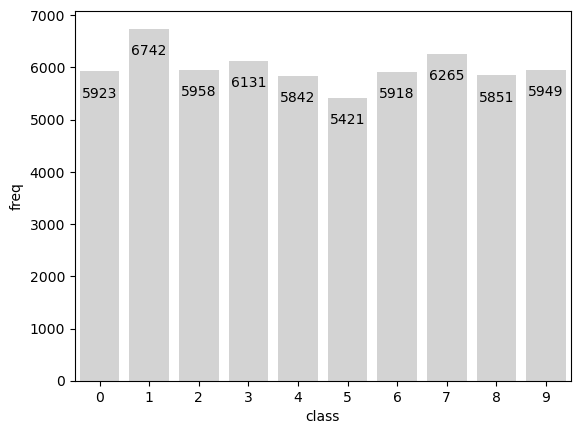

In [40]:
# Equilibre dans les données
classes = np.unique(y_train, return_counts=True)
classes = pd.DataFrame({'class':classes[0], 'freq':classes[1]})

bar_plot = sns.barplot(data = classes, x = 'class', y = 'freq', color = 'lightgray')
for i in range(len(classes['class'])):
    bar_plot.text(i, classes.iloc[i]['freq'] - 500, classes.iloc[i]['freq'], ha = 'center')

plt.savefig('Equilibre.png', bbox_inches = 'tight', pad_inches = .1);

In [41]:
# Encodage catégoriel des étiquettes en vecteurs one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train set:', y_train.shape)
print('Test set:', y_test.shape)

Train set: (60000, 10)
Test set: (10000, 10)


In [42]:
# Construction du modèle
model = Sequential()

# Ajout d'une couche masquée avec 128 neurones et une activation ReLU 
model.add(Dense(units=128, activation='relu', input_dim=len(X_train[1])))
# Ajout d'une autre couche masquée avec 64 neurones et une activation ReLU
model.add(Dense(units=64, activation='relu'))
# Ajout d'une autre couche masquée avec 32 neurones et une activation ReLU
model.add(Dense(units=32, activation='relu'))
# Ajout de la couche de sortie avec 10 neurones et une activation softmax
model.add(Dense(units=10, activation='softmax'))

# Configuration du modèle en spécifiant la fonction de perte, l'algorithme d'optimisation et la métrique de précision
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

In [43]:
# Résumé du modèle
model.summary(show_trainable = True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 dense (Dense)               (None, 128)               100480    Y          
                                                                            
 dense_1 (Dense)             (None, 64)                8256      Y          
                                                                            
 dense_2 (Dense)             (None, 32)                2080      Y          
                                                                            
 dense_3 (Dense)             (None, 10)                330       Y          
                                                                            
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________________________


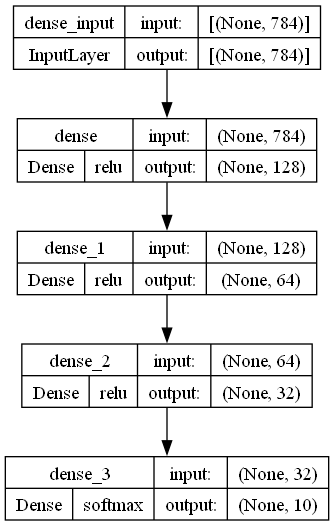

In [44]:
# Graphique du modèle

"""
!pip install pydot
!pip install graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
"""

from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'ModelGraph.png', show_shapes = True, show_layer_activations = True)

In [11]:
# Entraînement du modèle sur la base d'apprentissage
NN_model = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=.25)

Epoch 1/100
1407/1407 [==============================] - 10s 5ms/step - loss: 0.8019 - accuracy: 0.7667 - val_loss: 0.3545 - val_accuracy: 0.8970
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3064 - accuracy: 0.9123 - val_loss: 0.2759 - val_accuracy: 0.9192
Epoch 3/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2399 - accuracy: 0.9309 - val_loss: 0.2558 - val_accuracy: 0.9248
Epoch 4/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2010 - accuracy: 0.9422 - val_loss: 0.1999 - val_accuracy: 0.9437
Epoch 5/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1735 - accuracy: 0.9502 - val_loss: 0.1759 - val_accuracy: 0.9501
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1524 - accuracy: 0.9554 - val_loss: 0.1792 - val_accuracy: 0.9481
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1353 - accuracy: 0.9611 - val_loss: 0.1567 - val_a

In [27]:
# Evaluation du modele sur la base d'apprentissage
train_loss, train_acc = model.evaluate(X_train,  y_train)
print('Train accuracy:', train_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0371 - accuracy: 0.9931
Train accuracy: 0.9931166768074036


In [28]:
# Evaluation du modele sur la base de test
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 2ms/step - loss: 0.1147 - accuracy: 0.9772
Test accuracy: 0.9771999716758728


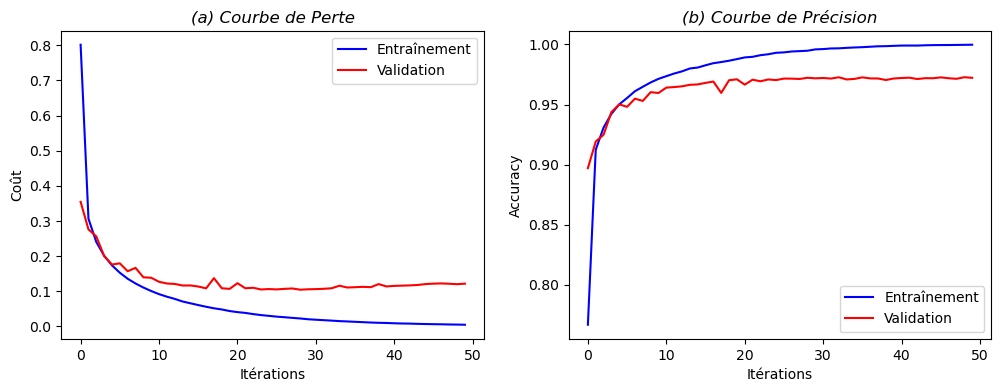

In [29]:
# Courbes de perte et de précision

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data = NN_model.history['loss'][:50], label='Entraînement', color = 'blue')
sns.lineplot(data = NN_model.history['val_loss'][:50], label='Validation', color = 'red')
plt.legend()
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('(a) Courbe de Perte', fontstyle = 'oblique')

plt.subplot(1, 2, 2)
sns.lineplot(data = NN_model.history['accuracy'][:50], label='Entraînement', color = 'blue')
sns.lineplot(data = NN_model.history['val_accuracy'][:50], label='Validation', color = 'red')
plt.legend()
plt.xlabel('Itérations')
plt.ylabel('Accuracy')
plt.title('(b) Courbe de Précision', fontstyle = 'oblique')

plt.savefig('LossAccCurves.png', bbox_inches = 'tight', pad_inches = .1);